In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Viewing classes in Directory**





In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/home/amuzak/Datasets/gc_modded/compressed"

classes = os.listdir(dir_example)
print(classes)

['split_train_val.py', 'val', 'train', 'test']


In [3]:
dir_example = "/home/amuzak/Datasets/gc_modded/compressed/train"

train_classes = os.listdir(dir_example)
print(train_classes)

['paper', 'cardboard', 'trash', 'metal', 'plastic', 'glass']


# **Visualizing Images in Dataset from each class**

# **Importing required Libraries for Model**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Configuration**

In [5]:
# train = '/home/amuzak/Datasets/garbage classification/Garbage classification/train'
# val = '/home/amuzak/Datasets/garbage classification/Garbage classification/val'
# test = '/home/amuzak/Datasets/garbage classification/Garbage classification/test'

In [6]:
train = '/home/amuzak/Datasets/gc_modded/compressed/train'
val = '/home/amuzak/Datasets/gc_modded/compressed/val'
test = '/home/amuzak/Datasets/gc_modded/compressed/test'

# **Data Preparation and Loading**

### *Creating a Generator for Training Set*

In [7]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 16,
                                                      class_mode = 'categorical')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1968 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [8]:
val_generator = ImageDataGenerator(rescale = 1/255)

val_generator = val_generator.flow_from_directory(val,
                                                  target_size = (300,300),
                                                  batch_size = 16,
                                                  class_mode = 'categorical')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 216 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


### *Creating a Generator for Testing Set*

In [9]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 16,
                                                    class_mode = 'categorical')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [10]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


((16, 300, 300, 3), (16, 6))

In [11]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

((16, 300, 300, 3), (16, 6))

# **Writing the labels into a text file '*Labels.txt* '**

In [12]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [13]:
!pwd

/home/amuzak/Notebooks


# **Model Architecture**

In [14]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

# **Model Compilation**

In [16]:
model.compile(optimizer = SGD(lr=0.01, momentum=0.9, decay=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# **Training the Model (batch_size = 32, epochs = 10)**

In [17]:
hist=model.fit(train_generator,
          validation_data=val_generator,
          epochs=60,
          verbose=1)

Epoch 1/60
123/123 [==============================] - 16s 112ms/step - loss: 1.7668 - accuracy: 0.2028 - val_loss: 1.7337 - val_accuracy: 0.2315
Epoch 2/60
123/123 [==============================] - 10s 81ms/step - loss: 1.7373 - accuracy: 0.2396 - val_loss: 1.6673 - val_accuracy: 0.3194
Epoch 3/60
123/123 [==============================] - 10s 81ms/step - loss: 1.6389 - accuracy: 0.2997 - val_loss: 1.6442 - val_accuracy: 0.2315
Epoch 4/60
123/123 [==============================] - 12s 99ms/step - loss: 1.5810 - accuracy: 0.3519 - val_loss: 1.6054 - val_accuracy: 0.3194
Epoch 5/60
123/123 [==============================] - 13s 106ms/step - loss: 1.4841 - accuracy: 0.3787 - val_loss: 1.4178 - val_accuracy: 0.4444
Epoch 6/60
123/123 [==============================] - 12s 94ms/step - loss: 1.3937 - accuracy: 0.4655 - val_loss: 1.3901 - val_accuracy: 0.4676
Epoch 7/60
123/123 [==============================] - 12s 96ms/step - loss: 1.3394 - accuracy: 0.4557 - val_loss: 1.2822 - val_accurac

In [18]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


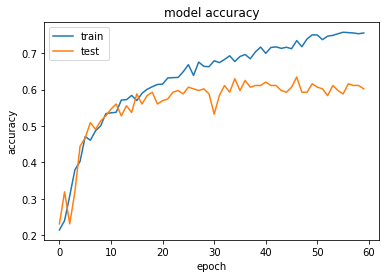

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.evaluate(test_generator, verbose=1)

22/22 [==============================] - 1s 55ms/step - loss: 1.4333 - accuracy: 0.5948


[1.4333066940307617, 0.5947521924972534]

NameError: name 'model' is not defined